In [1]:
from sklearn import datasets
x, y = datasets.make_blobs(n_samples=150,n_features=2, centers=2,cluster_std=1.05,random_state=2)

In [2]:
import tensorflow as tf

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

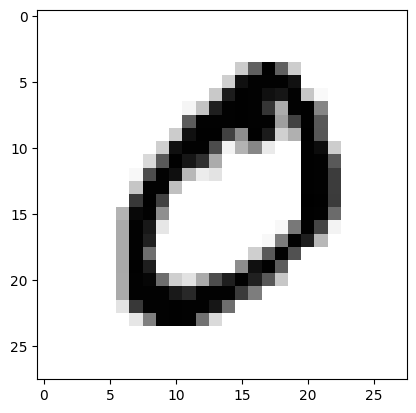

In [8]:
plt.imshow(x_train[1], cmap='binary')

In [9]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [10]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [11]:
print("y_train encoded shape ", y_train_encoded.shape)
print("y_test encoded shape ", y_test_encoded.shape)

y_train encoded shape  (60000, 10)
y_test encoded shape  (10000, 10)


In [12]:
# preprocessing
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

In [13]:
print(x_train_reshaped.shape)
print()

(60000, 784)



In [14]:
# display pixel value
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [15]:
# Data normalization
import math
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = pow(math.e,-10)

In [16]:
x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)

In [17]:
x_test_norm=(x_test_reshaped-x_mean)/(x_std+epsilon)

In [18]:
#Creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
#compiling model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
#Training the model
model.fit(x_train_norm , y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3794 - accuracy: 0.8892
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1833 - accuracy: 0.9473
Epoch 3/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1394 - accuracy: 0.9595


In [20]:
#Evaluating the model
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('Testset Accuracy=',accuracy*100)

313/313 [==============================] - 2s 4ms/step - loss: 0.1301 - accuracy: 0.9615
Testset Accuracy= 96.14999890327454


In [21]:
model.predict([x_test_norm])

313/313 [==============================] - 1s 3ms/step


array([[2.3594015e-05, 5.7791965e-07, 3.2958610e-04, ..., 9.9788088e-01,
        1.7757984e-05, 3.0317786e-04],
       [3.5060816e-06, 1.0878958e-03, 9.9831992e-01, ..., 1.2258293e-08,
        9.5096417e-05, 8.3933438e-10],
       [1.4453090e-05, 9.9587858e-01, 1.4435996e-03, ..., 1.2344464e-03,
        7.4875104e-04, 1.5683527e-04],
       ...,
       [5.6926922e-08, 2.5307708e-08, 7.6317673e-07, ..., 2.7673217e-05,
        3.7766051e-05, 2.1812784e-04],
       [1.7637996e-05, 9.4715782e-05, 1.3850177e-05, ..., 4.4495664e-06,
        8.5148541e-03, 1.7420864e-06],
       [2.2701784e-05, 2.8755315e-08, 4.3650092e-05, ..., 3.4987924e-08,
        1.8294662e-06, 3.6415216e-08]], dtype=float32)

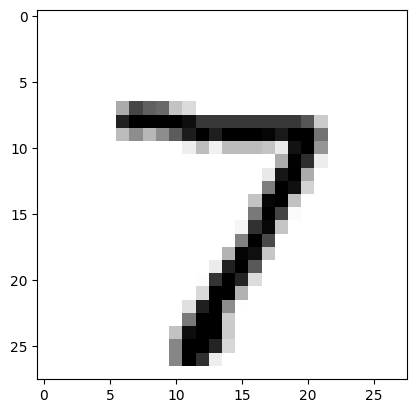

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap='binary')